# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

645

In [3]:
cities

['mushie',
 'bargal',
 'vila velha',
 'mataura',
 'fallon',
 'illoqqortoormiut',
 'genhe',
 'ushuaia',
 'punta arenas',
 'talara',
 'kodiak',
 'olafsvik',
 'rikitea',
 'lavrentiya',
 'busselton',
 'rincon',
 'wangqing',
 'nikolskoye',
 'new norfolk',
 'saint-georges',
 'san quintin',
 'katobu',
 'palmer',
 'albany',
 'whitehorse',
 'tuktoyaktuk',
 'kavaratti',
 'qaanaaq',
 'bluff',
 'provideniya',
 'port pirie',
 'arman',
 'victoria',
 'hilo',
 'lagoa',
 'saskylakh',
 'asfi',
 'san pedro',
 'port alfred',
 'yomitan',
 'kieta',
 'tuatapere',
 'bell ville',
 'kaitangata',
 'kapaa',
 'ostrovnoy',
 'gallup',
 'santa isabel do rio negro',
 'nizhneyansk',
 'muisne',
 'leningradskiy',
 'opuwo',
 'cervo',
 'saleaula',
 'klaksvik',
 'nevesinje',
 'bonthe',
 'hailar',
 'hobart',
 'arraial do cabo',
 'dikson',
 'killin',
 'lebu',
 'vaini',
 'iskateley',
 'kazalinsk',
 'dingle',
 'perelyub',
 'avarua',
 'isangel',
 'turukhansk',
 'russell',
 'puerto ayora',
 'nizhniy kuranakh',
 'jamestown',
 'bag

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [16]:
print('Beginning Data Retrieval\n-----------------------------\n')

weather_list = []
rcd = 0
sets = 1
i = 0
for city in cities:
    i += 1
    rcd += 1
    print(f'Processing Record {rcd} of Set {sets} | {city}')
    
    if rcd == 50:
        rcd = 0
        sets += 1
        
    url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial'
    
    weather = requests.get(url).json()
    
    try:
        weather_list.append({
            'city': city,
            'lat': weather['coord']['lat'],
            'lng': weather['coord']['lon'],
            'temp': weather['main']['temp_max'],
            'humidity': weather['main']['humidity'],
            'wind':weather['wind']['speed'],
            'cloudiness':weather['clouds']['all'],
            'country':weather['sys']['country'],
            'date':weather['dt']
        })
        
    except:
        print('City not found. Skipping...')
        pass
    if (i == 20):
        break
print('-----------------------------\nData Retrieval Complete\n-----------------------------')
        

Beginning Data Retrieval
-----------------------------

Processing Record 1 of Set 1 | mushie
Processing Record 2 of Set 1 | bargal
City not found. Skipping...
Processing Record 3 of Set 1 | vila velha
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | fallon
Processing Record 6 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 7 of Set 1 | genhe
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | talara
Processing Record 11 of Set 1 | kodiak
Processing Record 12 of Set 1 | olafsvik
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | lavrentiya
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | rincon
Processing Record 17 of Set 1 | wangqing
Processing Record 18 of Set 1 | nikolskoye
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | saint-georges
-----------------------------
Data Retrieval Complete
--------------

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_data = pd.DataFrame(weather_list)
city_data.date = city_data.date.map(time.ctime)
city_data.to_csv('city_data.csv')
city_data.head()

,city,lat,lng,temp,humidity,wind,cloudiness,country,date
0,mushie,-3.0167,16.9000,75.43,86,2.93,69,CD,Sun Apr 25 14:02:06 2021
1,vila velha,-20.3297,-40.2925,80.60,74,5.75,40,BR,Sun Apr 25 14:01:20 2021
2,mataura,-46.1927,168.8643,46.00,80,13.00,66,NZ,Sun Apr 25 14:00:40 2021
3,fallon,39.4735,-118.7774,53.60,37,5.75,90,US,Sun Apr 25 14:02:08 2021
4,genhe,50.7833,121.5167,39.69,47,3.62,100,CN,Sun Apr 25 14:02:09 2021


In [6]:
city_data.describe()

,lat,lng,temp,humidity,wind,cloudiness
count,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000
mean,20.396526,22.824370,61.198579,68.583612,8.089866,53.583612
std,32.242278,90.095441,20.246268,23.472830,5.629512,38.756754
min,-54.800000,-175.200000,-2.970000,5.000000,0.070000,0.000000
25%,-3.757925,-59.098500,46.400000,51.250000,3.690000,16.000000
50%,23.414050,26.196550,62.715000,75.000000,6.910000,64.000000
75%,47.011575,106.186425,78.800000,88.000000,11.500000,90.000000
max,78.218600,178.416700,98.600000,100.000000,33.380000,100.000000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [18]:
#  Get the indices of cities that have humidity over 100%.
city_data = city_data.loc[city_data["humidity"]<= 100]
city_data.head()

,city,lat,lng,temp,humidity,wind,cloudiness,country,date
0,mushie,-3.0167,16.9000,75.43,86,2.93,69,CD,Sun Apr 25 14:02:06 2021
1,vila velha,-20.3297,-40.2925,80.60,74,5.75,40,BR,Sun Apr 25 14:01:20 2021
2,mataura,-46.1927,168.8643,46.00,80,13.00,66,NZ,Sun Apr 25 14:00:40 2021
3,fallon,39.4735,-118.7774,53.60,37,5.75,90,US,Sun Apr 25 14:02:08 2021
4,genhe,50.7833,121.5167,39.69,47,3.62,100,CN,Sun Apr 25 14:02:09 2021


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

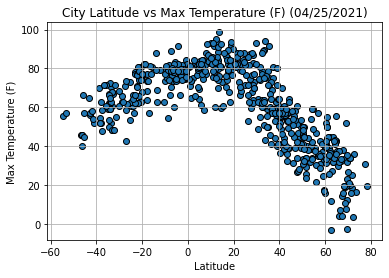

In [9]:
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature (F) (04/25/2021)')
plt.scatter(city_data['lat'],city_data['temp'],edgecolor='black', linewidths=1,)
plt.savefig("output_data/city_lat_vs_max_temp.png")

## Latitude vs. Humidity Plot

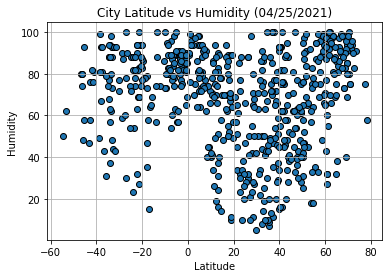

In [10]:
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs Humidity (04/25/2021)')
plt.scatter(city_data['lat'],city_data['humidity'],edgecolor='black', linewidths=1,)
plt.savefig("output_data/City_Lat_vs_Humidity.png")

## Latitude vs. Cloudiness Plot

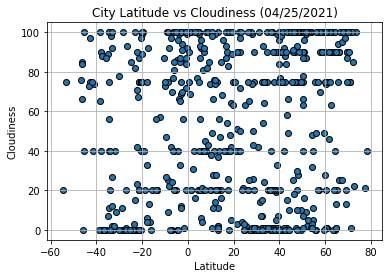

In [11]:
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs Cloudiness (04/25/2021)')
plt.scatter(city_data['lat'],city_data['cloudiness'],edgecolor='black', linewidths=1,)
plt.savefig("output_data/City_Lat_vs Cloudiness_.png")

## Latitude vs. Wind Speed Plot

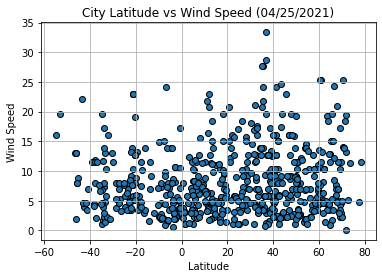

In [12]:
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs Wind Speed (04/25/2021)')
plt.scatter(city_data['lat'],city_data['wind'],edgecolor='black', linewidths=1,)
plt.savefig("output_data/City_Lat_vs_Wind_Speed.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [29]:
northern_pd = city_data.loc[city_data["lat"]>= 0]
southern_pd = city_data.loc[city_data["lat"]<= 0]

The St. Pearson Correlation Coefficient between both factors is -0.86


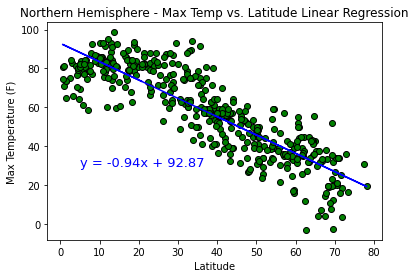

In [34]:
# establish linear regression values = linregress(city_data ("lat","temp".values)
slope, intercept, rValue, pValue, stderror = linregress(northern_pd['lat'], northern_pd['temp'])
print(f'The St. Pearson Correlation Coefficient between both factors is {round(rValue, 2)}')
# linear regression line 
regress = slope*(northern_pd['lat']) + intercept
regresstring = "y = " + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.annotate(regresstring, xy=(5,30), fontsize=13, color="blue")     
plt.plot(northern_pd['lat'],regress,"-",color="blue") 
plt.scatter(northern_pd['lat'],northern_pd['temp'], marker = "o", facecolors = 'green', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.show()

In [ ]:
    
      #y_values=max_temp 
# scatter plot of the data
#plt.figure(figsize=[15,6])
#plt.plot(tumor_weight.index,y_values,color='red')
#plt.xlabel('')
#plt.ylabel('Tumor Volume (mm3) Average')
#plt.title('Capomulin Treatment Weight vs Tumor Volume Average')
#plt.scatter(tumor_weight.index,tumor_weight.values)
#plt.show()
#print St. Pearson Correlation Coefficient
#print(f'The correlation between mouse weight and average tumor volume is {linear_corr[0]:.2f}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The St. Pearson Correlation Coefficient between both factors is 0.75


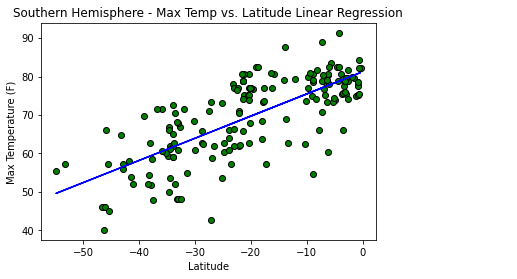

In [35]:
# establish linear regression values = linregress(city_data ("lat","temp".values)
slope, intercept, rValue, pValue, stderror = linregress(southern_pd['lat'], southern_pd['temp'])
print(f'The St. Pearson Correlation Coefficient between both factors is {round(rValue, 2)}')
# linear regression line 
regress = slope*(southern_pd['lat']) + intercept
regresstring = "y = " + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.annotate(regresstring, xy=(5,30), fontsize=13, color="blue")     
plt.plot(southern_pd['lat'],regress,"-",color="blue") 
plt.scatter(southern_pd['lat'],southern_pd['temp'], marker = "o", facecolors = 'green', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
# establish linear regression values = linregress(city_data ("lat","temp".values)
slope, intercept, rValue, pValue, stderror = linregress(northern_pd['lat'], northern_pd['humidity'])
print(f'The St. Pearson Correlation Coefficient between both factors is {round(rValue, 2)}')
# linear regression line 
regress = slope*(northern_pd['lat']) + intercept
regresstring = "y = " + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
plt.annotate(regresstring, xy=(5,30), fontsize=13, color="blue")     
plt.plot(northern_pd['lat'],regress,"-",color="blue") 
plt.scatter(northern_pd['lat'],northern_pd['temp'], marker = "o", facecolors = 'green', edgecolor='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression